This is an example notebook on the Markov network simulator-model. The model is constructed in ELFI-format. 

In [21]:
from functools import partial
import itertools

import elfi
import markov_network as mn
import seaborn as sns
import pandas as pd
%matplotlib inline 

In [4]:
model = mn.get_model()
bolfi = elfi.BOLFI(model['d'], 
                   batch_size=1,
                   initial_evidence=20,
                   update_interval=10,
                   acq_noise_var=[0.1, 0.1, 0.1,
                                  0.1, 0.1, 0.1,
                                  0.1, 0.1, 0.1,
                                  0.1, 0.1, 0.1])
%time post = bolfi.fit(n_evidence=200)

Parameter bounds not specified. Using [0,1] for each parameter.
We recommend having at least 65 initialization points for the initialization (now 20)
Progress [==================================================] 100.0% Complete
CPU times: user 1min 43s, sys: 3.24 s, total: 1min 46s
Wall time: 20.5 s


In [11]:
results = bolfi.sample(500)

NUTS: Diverged proposals after warmup (i.e. n_adapt=250 steps): 1
NUTS: Diverged proposals after warmup (i.e. n_adapt=250 steps): 1
4 chains of 500 iterations acquired. Effective sample size and Rhat for each parameter:
a_0 2000.0 0.9998174491233542
a_1 924.774916926389 0.9998690973310099
a_2 345.6310904852591 1.0065380680127114
a_3 1864.0469305105921 0.9992013598408177
a_4 506.147966711822 1.0103628413742394
a_5 752.9312064633419 1.0006794574060243


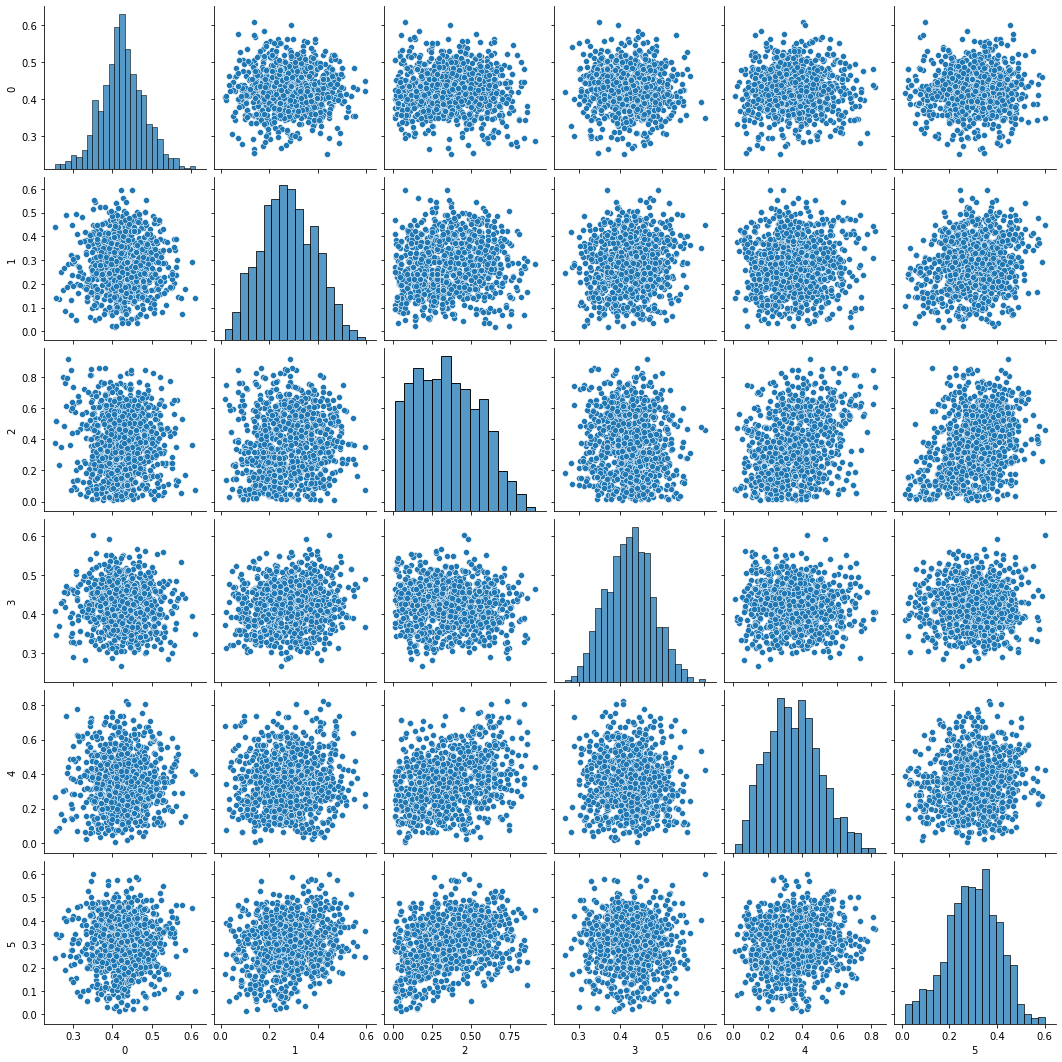

In [22]:
sns.pairplot(pd.DataFrame(results.samples_array))